# Introduction to Machine Learning - Course Project

### imports

In [1117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import time
from scipy import stats

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split, KFold
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay, roc_curve, auc
from sklearn import tree

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from IPython.display import display, HTML
from typing import Callable

## Part 1 - Exploration

#### Utils functions

In [1118]:
def print_general_data_exploration(data):
  print('\n \033[1m All of the data:\033[0m')
  display(data)
  print('\n \033[1m 10 first rows: \033[0m')
  display(data.head(10))
  print('\n \033[1m Description:\033[0m')
  display(data.iloc[:,1:].describe())
  print('\n \033[1m Shape:\033[0m ')
  display(data.shape)
  print('\n \033[1m Labels:\033[0m ')
  display(data.columns[1:])
  print('\n \033[1m Data types:\033[0m ')
  display(data.dtypes)

In [1119]:
# loading the train dataset
data=pd.read_csv("train.csv",index_col=0)

In [1120]:
print_general_data_exploration(data)


  All of the data:


,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,PageValues,...,device,internet_browser,Region,user_type,Weekend,A,B,C,D,purchase
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,0.000000,...,1.0,safari_15,1.0,Returning_Visitor,False,c_1,118.880094,log202,NaN,0
1,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,0.000000,0.200000,0.200000,0.000000,...,4.0,safari_14,9.0,Returning_Visitor,False,c_3,113.358423,log404,NaN,0
2,0.0,0.0,0.0,NaN,NaN,627.5 minutes,627.500000,0.020000,0.050000,0.000000,...,3.0,browser_3_v17,1.0,Returning_Visitor,True,c_4,121.507695,log202,NaN,0
3,0.0,0.0,0.0,0.0 minutes,19.0,154.2166667 minutes,154.216667,0.015789,0.024561,0.000000,...,2.0,chrome_99.1.3,1.0,Returning_Visitor,False,c_3,93.747176,log_100,NaN,0
4,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,0.000000,...,2.0,edge_96.0.1054.75,3.0,Returning_Visitor,False,c_3,99.545824,log202,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10474,3.0,145.0,0.0,0.0 minutes,53.0,1783.791667 minutes,1928.791667,0.007143,0.029031,12.241717,...,4.0,browser_6_v12,1.0,Returning_Visitor,True,c_1,79.548460,log400,NaN,0
10475,0.0,0.0,0.0,0.0 minutes,5.0,465.75 minutes,NaN,0.000000,0.021333,0.000000,...,3.0,chrome_98.0.1,1.0,Returning_Visitor,True,c_8,99.457255,log202,NaN,0
10476,0.0,0.0,0.0,0.0 minutes,6.0,184.25 minutes,NaN,0.083333,0.086667,0.000000,...,3.0,chrome_99.1.3,1.0,Returning_Visitor,True,c_13,94.417344,log8080,NaN,0



  10 first rows: 


,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,PageValues,...,device,internet_browser,Region,user_type,Weekend,A,B,C,D,purchase
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,0.0,...,1.0,safari_15,1.0,Returning_Visitor,False,c_1,118.880094,log202,NaN,0
1,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,0.000000,0.200000,0.200000,0.0,...,4.0,safari_14,9.0,Returning_Visitor,False,c_3,113.358423,log404,NaN,0
2,0.0,0.0,0.0,NaN,NaN,627.5 minutes,627.500000,0.020000,0.050000,0.0,...,3.0,browser_3_v17,1.0,Returning_Visitor,True,c_4,121.507695,log202,NaN,0
3,0.0,0.0,0.0,0.0 minutes,19.0,154.2166667 minutes,154.216667,0.015789,0.024561,0.0,...,2.0,chrome_99.1.3,1.0,Returning_Visitor,False,c_3,93.747176,log_100,NaN,0
4,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,0.0,...,2.0,edge_96.0.1054.75,3.0,Returning_Visitor,False,c_3,99.545824,log202,NaN,0
5,0.0,0.0,0.0,0.0 minutes,2.0,NaN,NaN,0.000000,0.100000,0.0,...,2.0,NaN,2.0,Returning_Visitor,False,c_3,104.712405,log200,NaN,0
6,0.0,0.0,0.0,0.0 minutes,3.0,738.0 minutes,NaN,0.000000,0.022222,0.0,...,2.0,edge_96.0.1054.72,1.0,Returning_Visitor,False,c_2,89.786568,log404,NaN,0
7,0.0,0.0,0.0,0.0 minutes,3.0,395.0 minutes,395.000000,0.000000,0.066667,0.0,...,1.0,safari_15,3.0,Returning_Visitor,False,c_3,101.184534,log_100,NaN,0
8,NaN,0.0,0.0,0.0 minutes,16.0,407.75 minutes,NaN,0.018750,0.025833,0.0,...,1.0,safari_15.4,4.0,Returning_Visitor,False,NaN,83.931739,log_100,NaN,0



  Description:


,admin_page_duration,num_of_info_pages,num_of_product_pages,total_duration,BounceRates,ExitRates,PageValues,closeness_to_holiday,device,Region,B,D,purchase
count,10066.000000,9792.000000,10076.000000,5726.000000,10457.000000,10453.000000,10452.000000,9983.000000,10156.000000,10460.000000,10456.000000,105.000000,10479.000000
mean,80.462468,0.502655,31.870187,1302.457216,0.021854,0.042859,5.900387,0.061985,2.122981,3.155641,99.769628,4.060440,0.154690
std,179.217548,1.265812,44.816259,2039.312905,0.048100,0.048297,18.727496,0.199429,0.906859,2.404672,10.050268,2.189818,0.361626
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,60.733919,-1.235571,0.000000
25%,0.000000,0.000000,7.000000,221.000000,0.000000,0.014283,0.000000,0.000000,2.000000,1.000000,93.030568,3.141657,0.000000
50%,8.000000,0.000000,18.000000,677.851191,0.002968,0.025161,0.000000,0.000000,2.000000,3.000000,99.787249,4.432221,0.000000
75%,93.000000,0.000000,38.000000,1605.733333,0.016667,0.050000,0.000000,0.000000,3.000000,4.000000,106.506626,5.531061,0.000000
max,3398.750000,24.000000,705.000000,47850.920680,0.200000,0.200000,361.763742,1.000000,8.000000,9.000000,141.735142,7.618254,1.000000



  Shape: 


(10479, 22)


  Labels: 


Index(['admin_page_duration', 'num_of_info_pages', 'info_page_duration',
       'num_of_product_pages', 'product_page_duration', 'total_duration',
       'BounceRates', 'ExitRates', 'PageValues', 'closeness_to_holiday',
       'Month', 'device', 'internet_browser', 'Region', 'user_type', 'Weekend',
       'A', 'B', 'C', 'D', 'purchase'],
      dtype='object')


  Data types: 


num_of_admin_pages       float64
admin_page_duration      float64
num_of_info_pages        float64
info_page_duration        object
num_of_product_pages     float64
product_page_duration     object
total_duration           float64
BounceRates              float64
ExitRates                float64
PageValues               float64
closeness_to_holiday     float64
Month                     object
device                   float64
internet_browser          object
Region                   float64
user_type                 object
Weekend                   object
A                         object
B                        float64
C                         object
D                        float64
purchase                   int64
dtype: object

we can see that the features are divided to categorical, numerical and boolean. 

In [1121]:
# mean of the purchase column
data['purchase'].mean()

0.15469033304704646

only 0.15% of all site roaming where ended with a purchase.

#### Lets visualize the visitors we had on our website and see the distribution by month

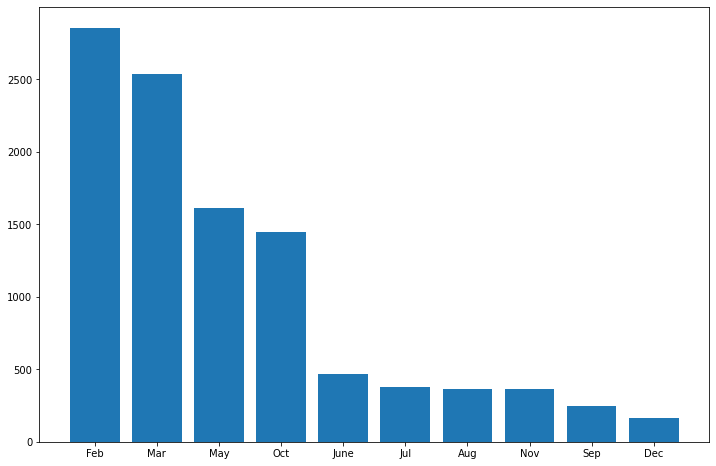

In [1122]:
# Values by month
x_labels=data['Month'].dropna().unique()
y_labels=data['Month'].value_counts()
plt.bar(range(len(y_labels)), y_labels, align='center')
plt.xticks(range(len(x_labels)), x_labels, size='medium')
plt.show()
# most of the people are returning users

#### We want to see the distribution of the returning visitors compared to the new visitors

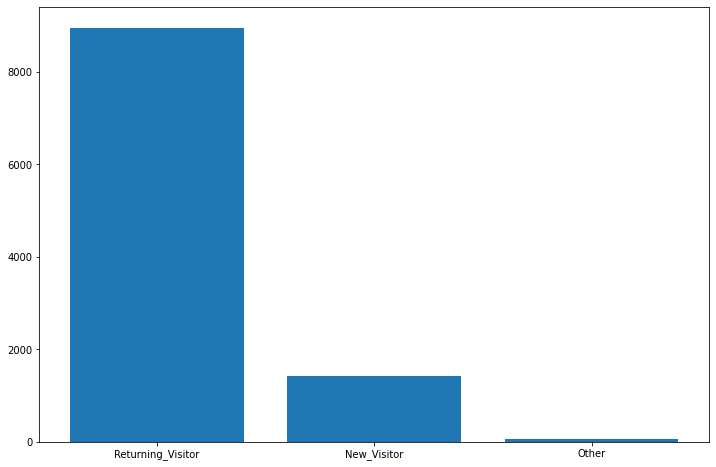

In [1123]:
x_labels=data['user_type'].dropna().unique()
y_labels=data['user_type'].value_counts()
plt.bar(range(len(y_labels)), y_labels, align='center')
plt.xticks(range(len(x_labels)), x_labels, size='medium')
plt.show()
# most of the people are returning users

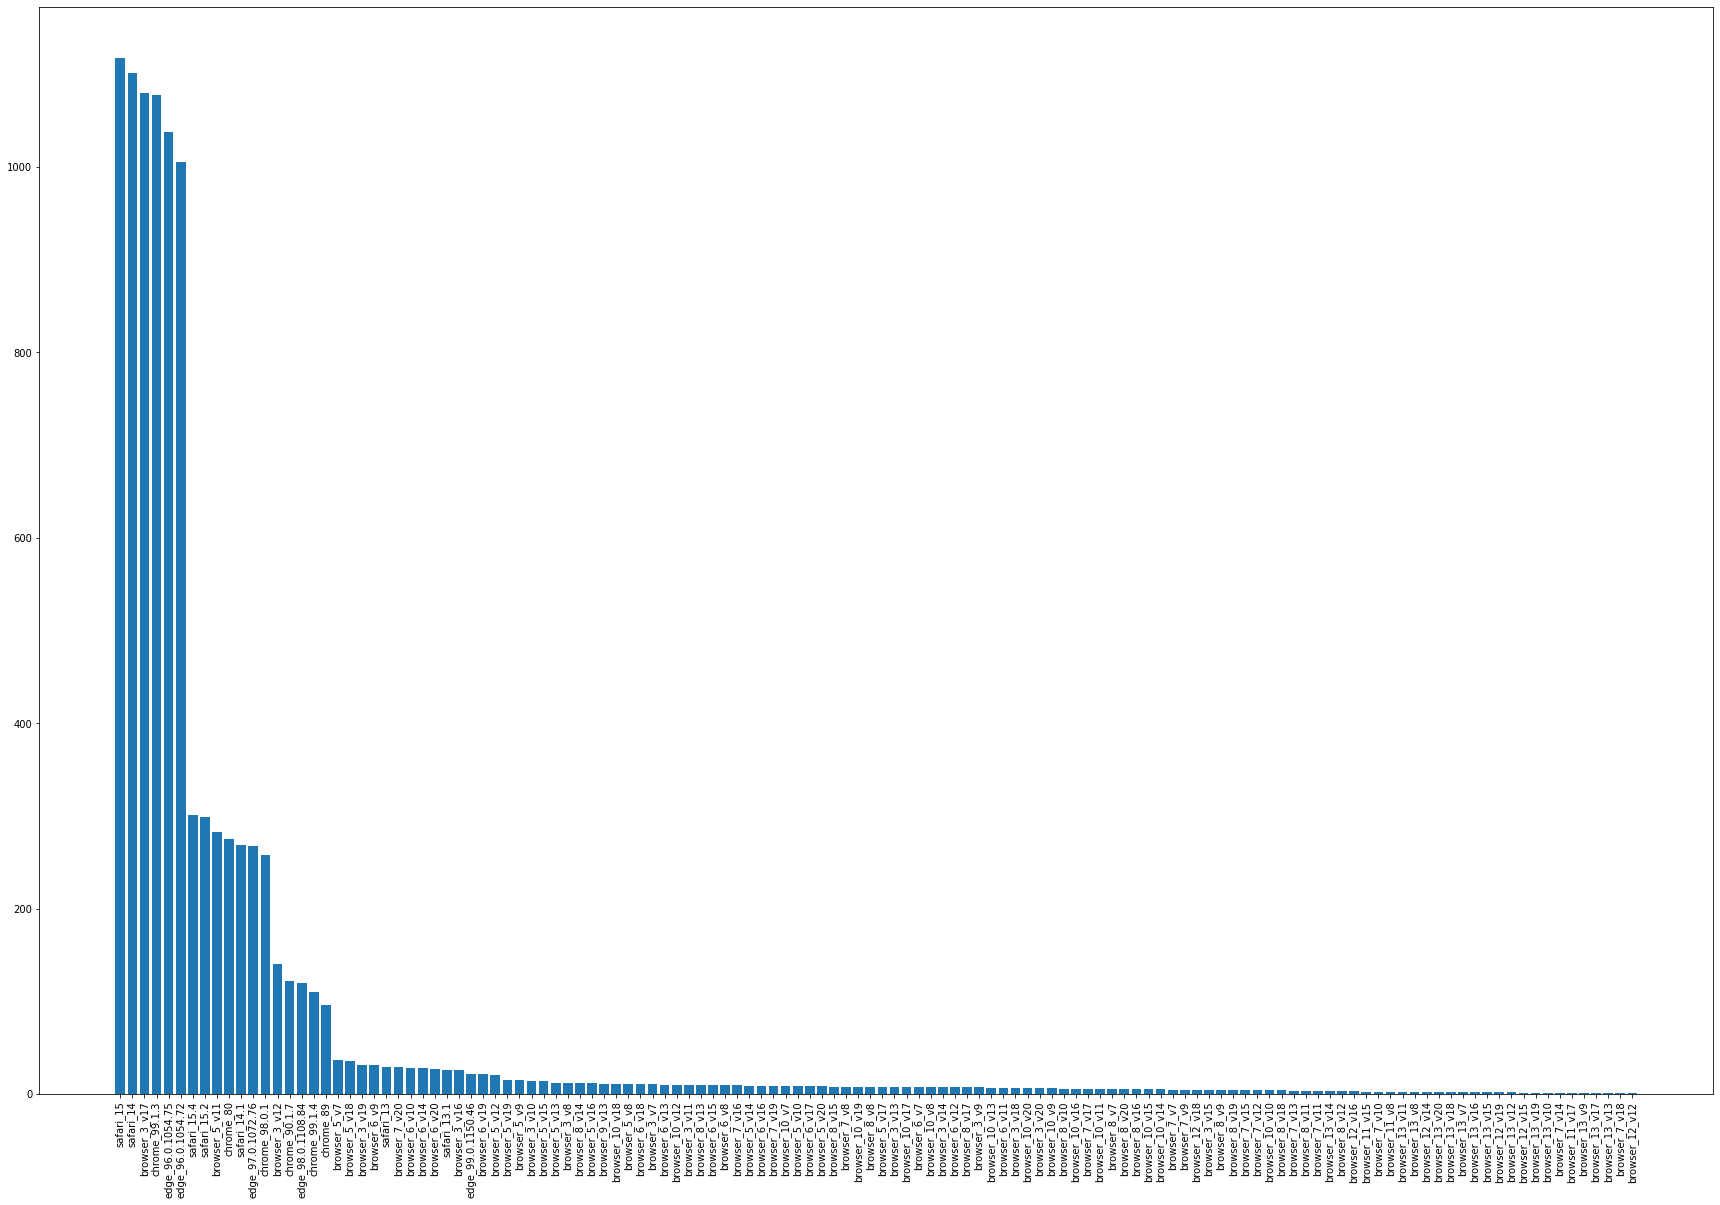

In [1124]:
x_labels=data['internet_browser'].dropna().unique() 
y_labels=data['internet_browser'].value_counts()
plt.figure(figsize=(30,20))
plt.bar(range(len(y_labels)), y_labels, align='center')
plt.rcParams["figure.figsize"] = (30,20)
plt.xticks(range(len(x_labels)), x_labels, size='medium',rotation=90)
plt.show()


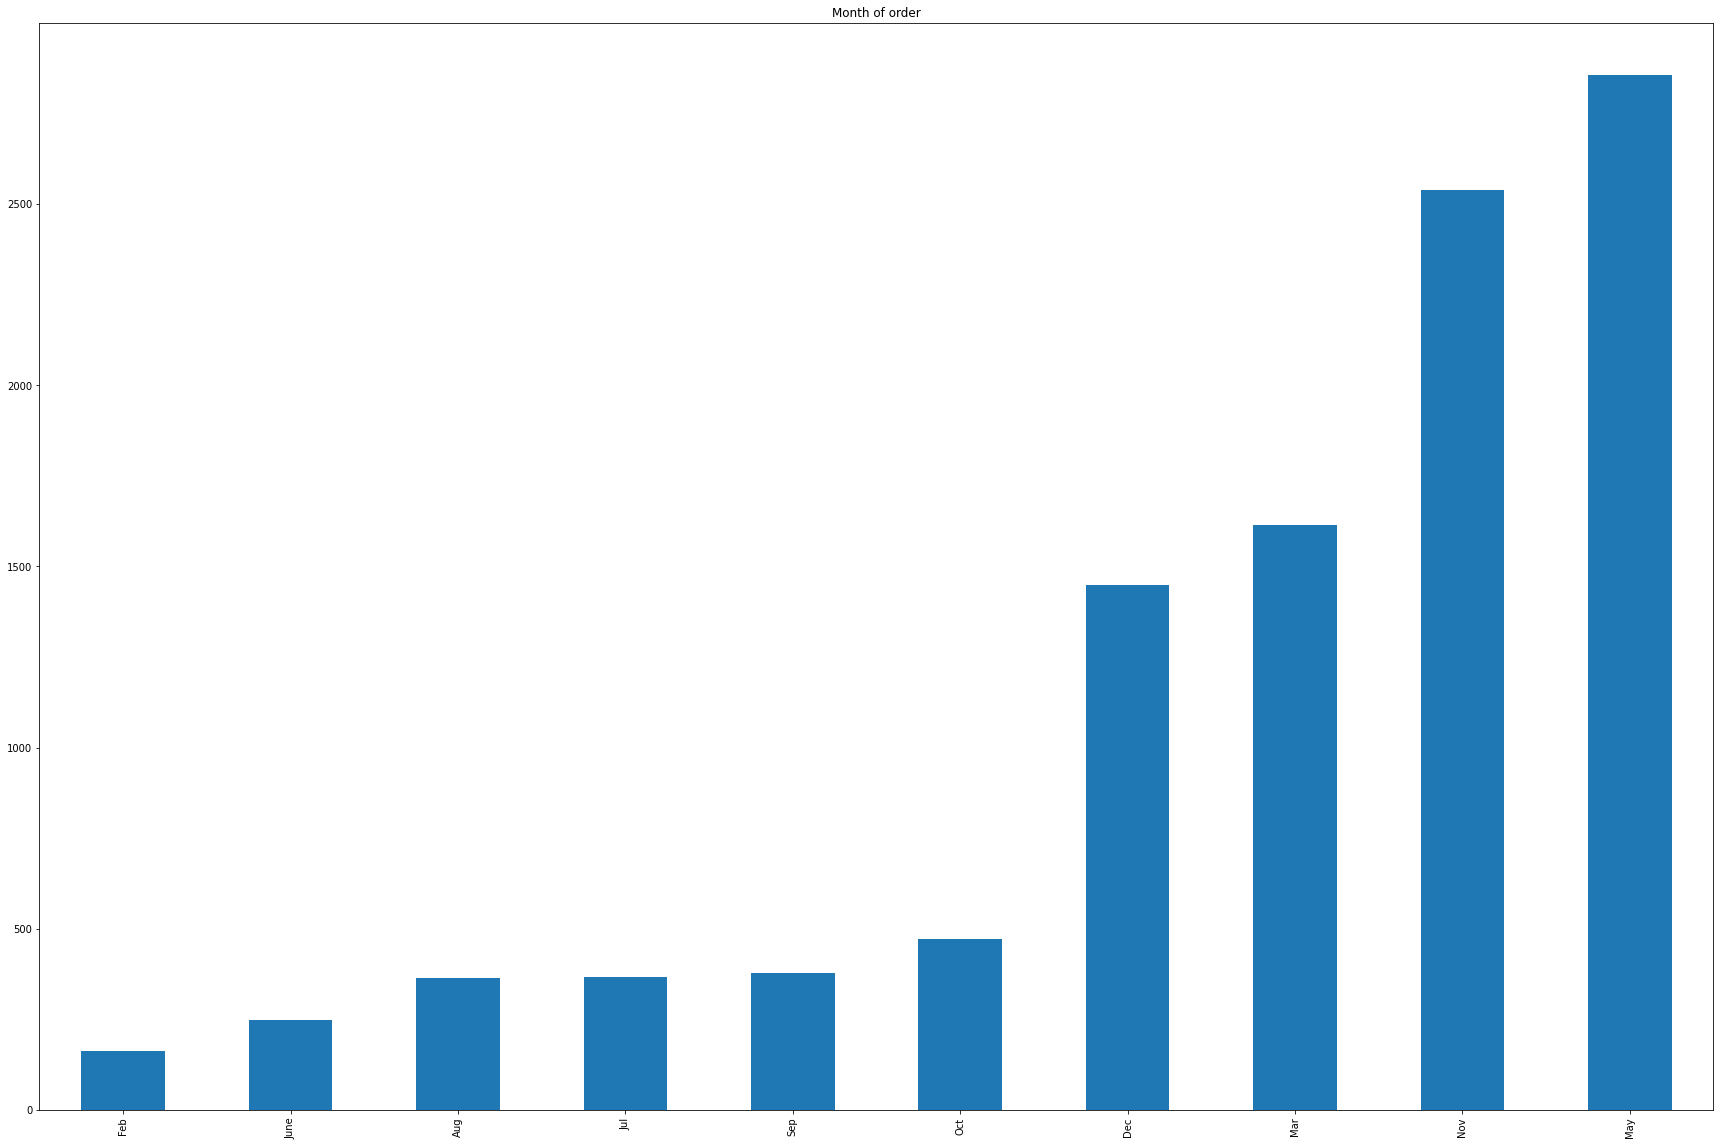

In [1125]:
data['Month'].value_counts().sort_values().plot(kind = 'bar')
plt.title('Month of order')
plt.show()

we can see that during May, March , November and December there were a lot more purchases than the rest of the months

In [1126]:
devices=data['device'].unique()
devices_count=data['device'].value_counts()
devices_count
data[['device','internet_browser']]



,device,internet_browser
id,,
0,1.0,safari_15
1,4.0,safari_14
2,3.0,browser_3_v17
3,2.0,chrome_99.1.3
4,2.0,edge_96.0.1054.75
...,...,...
10474,4.0,browser_6_v12
10475,3.0,chrome_98.0.1
10476,3.0,chrome_99.1.3


#### Based on the following chart we can see that we have alot of internet browsers and we might need to group. we can see that we can group them by the browser name (The version is not that important to us)

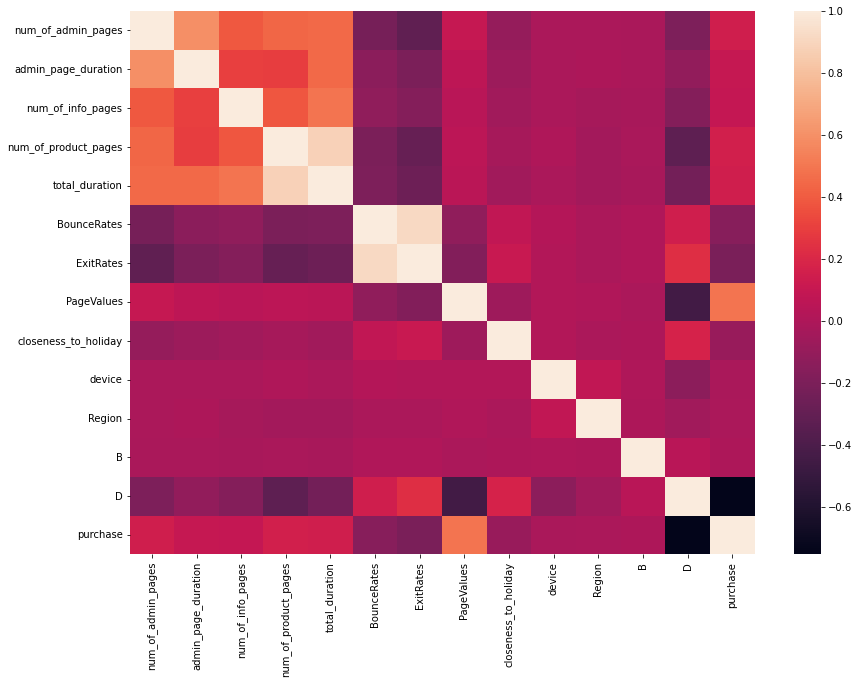

num_of_admin_pages   num_of_admin_pages      1.000000
ExitRates            BounceRates             0.911589
total_duration       num_of_product_pages    0.877881
D                    purchase                0.753238
admin_page_duration  num_of_admin_pages      0.591505
                                               ...   
B                    device                  0.004767
                     purchase                0.003981
Region               admin_page_duration     0.003730
device               num_of_product_pages    0.000877
Region               B                       0.000098
Length: 92, dtype: float64

In [1127]:
corr = data.corr()

plt.figure(figsize = (14,10))
sns.heatmap(corr, 
        xticklabels=data.corr().columns,
        yticklabels=data.corr().columns)
plt.show()
corr_sorted=corr.abs().unstack().sort_values(kind="quicksort",ascending=False).drop_duplicates()
corr_sorted


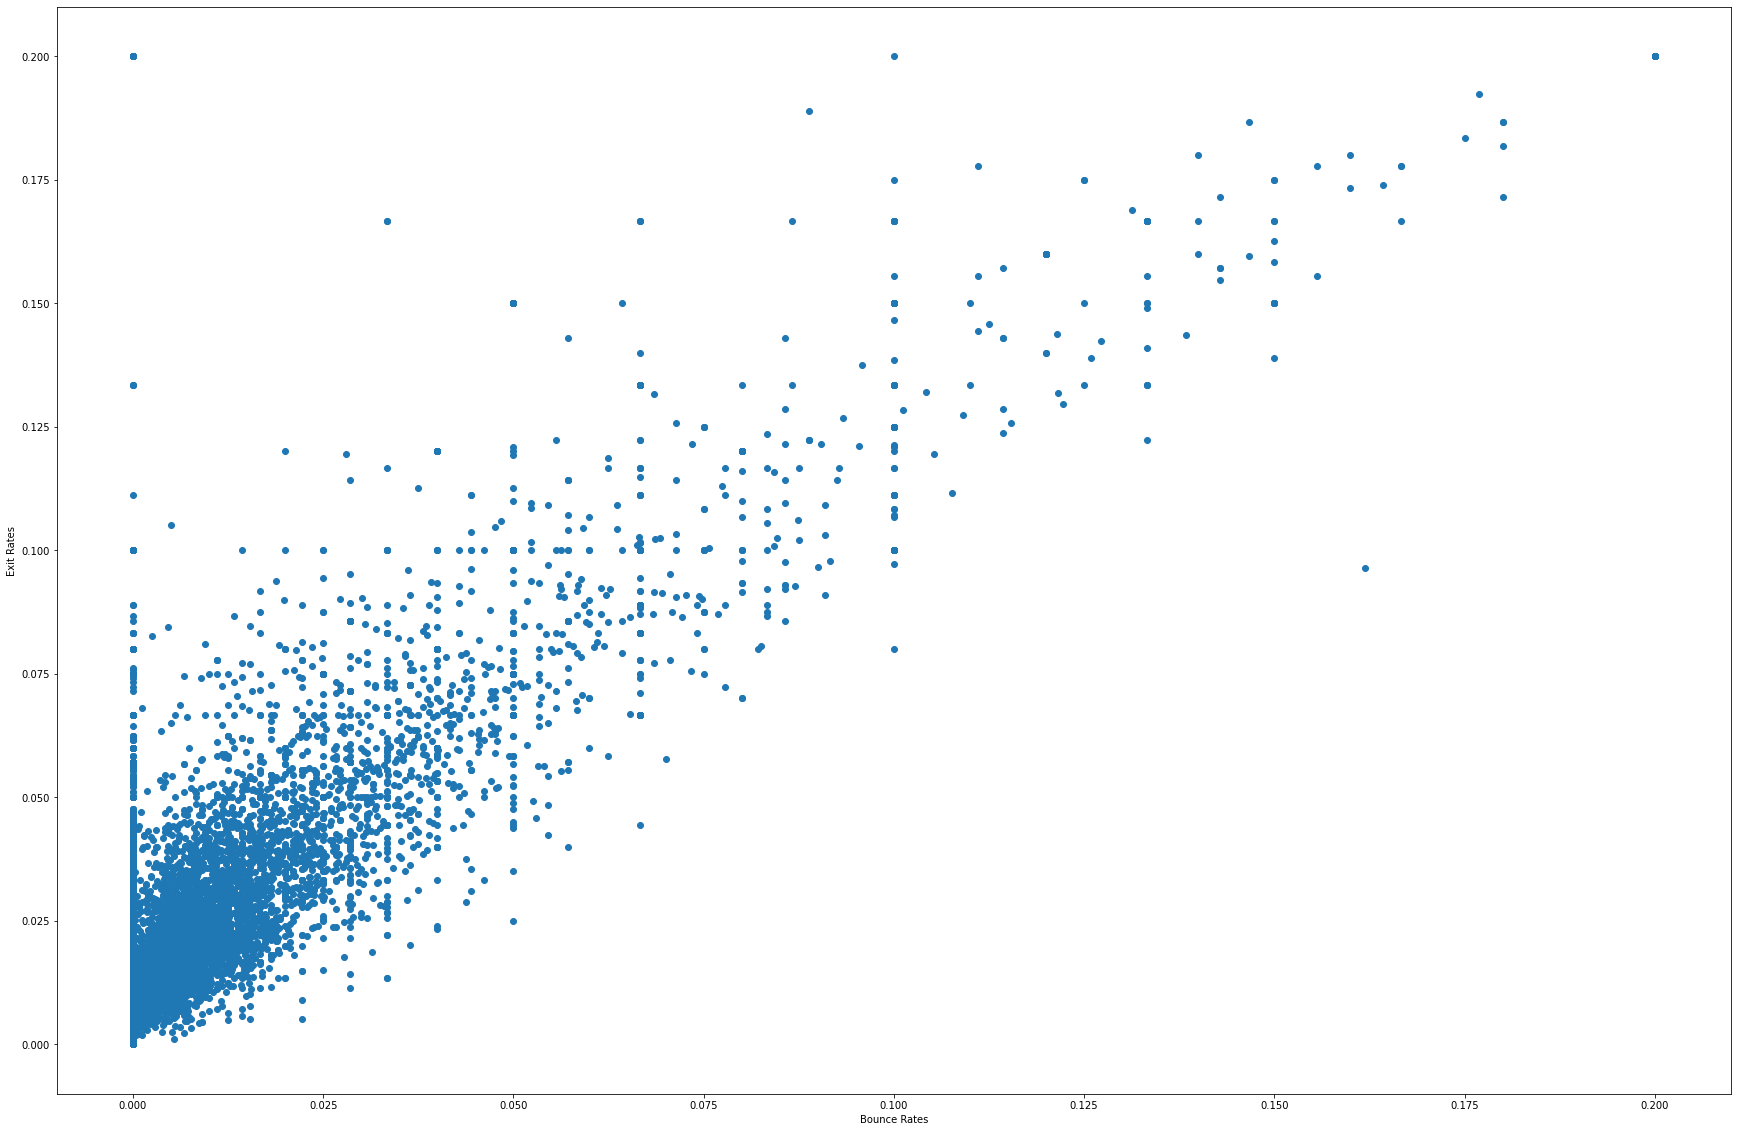

In [1128]:

plt.scatter(data['BounceRates'], data['ExitRates'])
plt.xlabel('Bounce Rates')
plt.ylabel('Exit Rates')
plt.show()

Based on the correlation diagrams above we can see that we might reduce the number of features we are going to use, this statement based on the correlation score we get between features

In [1129]:
data.groupby(['closeness_to_holiday']).mean().sort_values(by='purchase',ascending=False)

,num_of_admin_pages,admin_page_duration,num_of_info_pages,num_of_product_pages,total_duration,BounceRates,ExitRates,PageValues,device,Region,B,D,purchase
closeness_to_holiday,,,,,,,,,,,,,
0.0,2.448308,85.202277,0.526046,32.339520,1339.335349,0.020413,0.040867,6.325311,2.118418,3.162718,99.715344,3.959202,0.165327
0.2,1.669118,62.087281,0.289855,23.506944,1048.624100,0.028699,0.051883,4.281145,2.063380,2.918367,100.388319,3.435172,0.088435
0.6,1.211679,41.205323,0.294340,24.646643,895.628176,0.038347,0.063184,2.732476,2.150000,2.986207,99.126289,7.226965,0.075862
1.0,1.592920,45.318612,0.353448,33.470588,1119.577252,0.026659,0.052945,2.149979,2.146552,3.227642,99.290949,NaN,0.073171
0.4,1.375661,41.955186,0.354839,28.310881,1128.136278,0.038360,0.061747,2.201430,2.104167,3.110553,100.248700,5.034883,0.040201
0.8,1.015936,30.098968,0.232653,27.652344,981.356301,0.035113,0.062143,1.388950,2.255906,3.000000,99.648618,5.264853,0.033835


In [1130]:
data.groupby(['Weekend']).mean().sort_values(by='purchase',ascending=False)

,num_of_admin_pages,admin_page_duration,num_of_info_pages,num_of_product_pages,total_duration,BounceRates,ExitRates,PageValues,closeness_to_holiday,device,Region,B,D,purchase
Weekend,,,,,,,,,,,,,,
True,2.494954,85.386493,0.580889,33.169697,1310.843434,0.017961,0.037499,6.114784,0.054326,2.117848,3.146291,99.823636,4.546667,0.173499
False,2.271325,78.992425,0.479203,31.476006,1300.850707,0.023029,0.044453,5.841860,0.064401,2.124728,3.157600,99.758727,3.931560,0.148862


In [1131]:
data.groupby(['Region']).mean()['purchase'].sort_values()

Region
8.0    0.135501
6.0    0.142446
3.0    0.146282
7.0    0.148092
4.0    0.150602
2.0    0.159574
1.0    0.160010
9.0    0.167053
5.0    0.175182
Name: purchase, dtype: float64

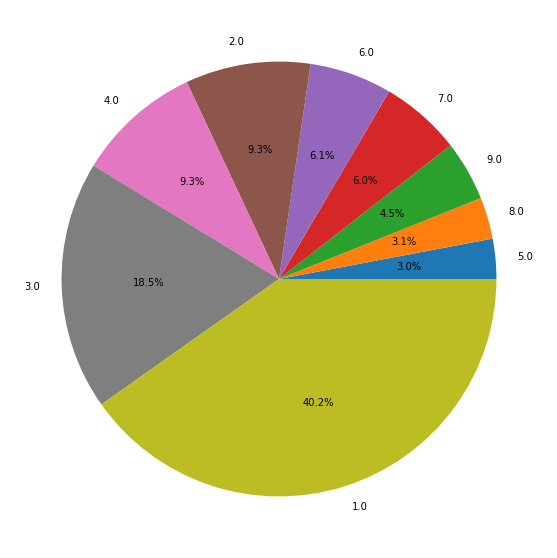

In [1132]:
purchase_by_region=data.groupby(['Region']).sum()['purchase'].sort_values()
fig = plt.figure(figsize=(10,10))
fig.patch.set_facecolor('white')
plt.pie(purchase_by_region,labels=purchase_by_region.index,autopct='%1.1f%%')
plt.show()

# Part 2 - Preprocessing

#### Utils functions

In [1133]:
def get_browser_name(name: str) -> str:
    return name.split('_')[0]

def change_bool_to_binary(label: str) -> int:
  return 1 if label else 0

def remove_minutes_string(cell_data: object) -> str:
    return cell_data.replace(' minutes','')
  
def drop_columns(data: pd.DataFrame,columns: list[str]) -> pd.DataFrame:
  return data.drop(columns=columns)
  
def plot_principal_components(X: np.array) -> np.array:
    pca=PCA()
    pca.fit(X)
    pca_explained_var=pca.explained_variance_ratio_
    pca_cumsum_var=pca_explained_var.cumsum()
    print(f'Number of components:\n {pca.components_}\n' )
    print(f'Explained variance ratio:\n {pca_explained_var}\n' )
    print(f'Cumulative Sum of the explained variance ratio:\n {pca_cumsum_var}\n')
    plt.plot(pca_cumsum_var)
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
     
def dim_reduction_pca(X: np.array,n_components: int) -> np.array:
  pca = PCA(n_components)
  pca.fit(X)
  X_pca = pca.transform(X)
  print(pca.n_components_)
  print("original shape:", X.shape)
  print("transformed shape:", X_pca.shape)
  return X_pca
  
# we tried StandardScalar and MinMaxScaler and found out that the minmaxScalar is causing us overfitting
def normalize_data(X: np.array) -> np.array:
  scaler = StandardScaler().fit(X)
  return scaler.transform(X)

def data_transform_dummy_vars(data: pd.DataFrame,columns: list[str]) -> pd.DataFrame:
  return pd.get_dummies(data=data,columns=columns,drop_first=True)
   
def get_most_frequent(df: pd.DataFrame,column: str)-> int:
  return df[column].value_counts().sort_values(ascending=False).index[0]
    

In [1134]:
# cleaning the data remove unnecessary strings and casting str to floats
data['Weekend']=data['Weekend'].apply(change_bool_to_binary) 
data['internet_browser']=data['internet_browser'].astype(str).apply(get_browser_name)
data['info_page_duration']= (data['info_page_duration'].astype(str).apply(remove_minutes_string)).astype(float)
data['product_page_duration']= (data['product_page_duration'].astype(str).apply(remove_minutes_string)).astype(float)

In [1135]:
# displaying the number of NaN values in each column
data.isna().sum()

num_of_admin_pages         605
admin_page_duration        413
num_of_info_pages          687
info_page_duration         317
num_of_product_pages       403
product_page_duration      621
total_duration            4753
BounceRates                 22
ExitRates                   26
PageValues                  27
closeness_to_holiday       496
Month                       25
device                     323
internet_browser             0
Region                      19
user_type                   23
Weekend                      0
A                          706
B                           23
C                           23
D                        10374
purchase                     0
dtype: int64

In [1136]:
# removing columns and rows with NaN values
# D column has 10374 missing values out of 10479 which is 0.989 percent of the total
data=data.drop(['D'],axis=1)
# 23
data



,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,PageValues,...,Month,device,internet_browser,Region,user_type,Weekend,A,B,C,purchase
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,1.0,0.000000,NaN,0.200000,0.200000,0.000000,...,Feb,1.0,safari,1.0,Returning_Visitor,0,c_1,118.880094,log202,0
1,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.200000,0.200000,0.000000,...,Feb,4.0,safari,9.0,Returning_Visitor,0,c_3,113.358423,log404,0
2,0.0,0.0,0.0,NaN,NaN,627.500000,627.500000,0.020000,0.050000,0.000000,...,Feb,3.0,browser,1.0,Returning_Visitor,1,c_4,121.507695,log202,0
3,0.0,0.0,0.0,0.0,19.0,154.216667,154.216667,0.015789,0.024561,0.000000,...,Feb,2.0,chrome,1.0,Returning_Visitor,0,c_3,93.747176,log_100,0
4,0.0,0.0,0.0,0.0,1.0,0.000000,NaN,0.200000,0.200000,0.000000,...,Feb,2.0,edge,3.0,Returning_Visitor,0,c_3,99.545824,log202,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10474,3.0,145.0,0.0,0.0,53.0,1783.791667,1928.791667,0.007143,0.029031,12.241717,...,Dec,4.0,browser,1.0,Returning_Visitor,1,c_1,79.548460,log400,0
10475,0.0,0.0,0.0,0.0,5.0,465.750000,NaN,0.000000,0.021333,0.000000,...,Nov,3.0,chrome,1.0,Returning_Visitor,1,c_8,99.457255,log202,0
10476,0.0,0.0,0.0,0.0,6.0,184.250000,NaN,0.083333,0.086667,0.000000,...,Nov,3.0,chrome,1.0,Returning_Visitor,1,c_13,94.417344,log8080,0


In [1137]:
# #we will start to drop some col with high correlation
# We have 4753 missing values in total_duration column. we will drop this column and work with num_of_product_pages. which has the highest correlation with this feature.
data = data.drop(columns=['ExitRates'],inplace=False)
data['total_duration']=data['admin_page_duration']+data['info_page_duration']+data['product_page_duration']
#we are dropping all the duration col and stay just with the total duration
data = data.drop(columns=['admin_page_duration'],inplace=False)
data = data.drop(columns=['info_page_duration'],inplace=False)
data = data.drop(columns=['product_page_duration'],inplace=False)

In [1138]:
(data['user_type']=='Other').sum()/data.shape[0]

0.006870884626395649

In [1139]:
# there are 87 categories in this column and we dont know what they represent - we will drop it
len(data['A'].unique())
data = data.drop(columns=['A'],inplace=False)

In [1140]:
raw_train_data=data.copy(0)
data['BounceRates'].fillna(data['BounceRates'].median(), inplace = True) # only 22 missing values
data['total_duration'].fillna(data['total_duration'].median(), inplace = True) # only 22 missing values
data['num_of_admin_pages'].fillna(data['num_of_admin_pages'].median(), inplace = True)
data['num_of_info_pages'].fillna(data['num_of_info_pages'].median(), inplace = True) # only 22 missing values
data['num_of_product_pages'].fillna(data['num_of_product_pages'].median(), inplace = True)
data['closeness_to_holiday'].fillna(data['closeness_to_holiday'].median(), inplace = True) # only 22 missing values
data['PageValues'].fillna(data['PageValues'].median(), inplace = True) # only 22 missing values
data['device'].fillna(get_most_frequent(data,'device'), inplace = True)
data['Region'].fillna(get_most_frequent(data,'Region'), inplace = True)
data['Month'].fillna(get_most_frequent(data,'Month'), inplace = True)
data['user_type'].fillna(get_most_frequent(data,'user_type'), inplace = True)
data['B'].fillna(get_most_frequent(data,'B'), inplace = True)
data['C'].fillna(get_most_frequent(data,'C'), inplace = True)
# (data['PageValues']==0).sum()
# (data.isna().sum(axis=1).sort_values(ascending=False)>=6).sum()
print(data.isna().sum())
data
# data = data[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
# # boxplot_diagram_1 = data.boxplot(co, figsize=(5,5))
# boxplot= data.boxplot(column='PageValues',figsize=(5,5))

num_of_admin_pages      0
num_of_info_pages       0
num_of_product_pages    0
total_duration          0
BounceRates             0
PageValues              0
closeness_to_holiday    0
Month                   0
device                  0
internet_browser        0
Region                  0
user_type               0
Weekend                 0
B                       0
C                       0
purchase                0
dtype: int64


,num_of_admin_pages,num_of_info_pages,num_of_product_pages,total_duration,BounceRates,PageValues,closeness_to_holiday,Month,device,internet_browser,Region,user_type,Weekend,B,C,purchase
id,,,,,,,,,,,,,,,,
0,0.0,0.0,1.0,0.000000,0.200000,0.000000,0.0,Feb,1.0,safari,1.0,Returning_Visitor,0,118.880094,log202,0
1,0.0,0.0,1.0,0.000000,0.200000,0.000000,0.0,Feb,4.0,safari,9.0,Returning_Visitor,0,113.358423,log404,0
2,0.0,0.0,18.0,686.046667,0.020000,0.000000,0.0,Feb,3.0,browser,1.0,Returning_Visitor,1,121.507695,log202,0
3,0.0,0.0,19.0,154.216667,0.015789,0.000000,0.0,Feb,2.0,chrome,1.0,Returning_Visitor,0,93.747176,log_100,0
4,0.0,0.0,1.0,0.000000,0.200000,0.000000,0.4,Feb,2.0,edge,3.0,Returning_Visitor,0,99.545824,log202,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10474,3.0,0.0,53.0,1928.791667,0.007143,12.241717,0.0,Dec,4.0,browser,1.0,Returning_Visitor,1,79.548460,log400,0
10475,0.0,0.0,5.0,465.750000,0.000000,0.000000,0.0,Nov,3.0,chrome,1.0,Returning_Visitor,1,99.457255,log202,0
10476,0.0,0.0,6.0,184.250000,0.083333,0.000000,0.0,Nov,3.0,chrome,1.0,Returning_Visitor,1,94.417344,log8080,0


Transforming all the objects to dummy var

In [1141]:
data['user_type'].replace({"Other":get_most_frequent(data,'user_type')},inplace=True)

In [1142]:
# months by quarters
data['Month'].replace({"Jan": "Q1","Feb":"Q1","Mar":"Q1","Apr":"Q2","May":'Q2',"June":'Q2',"July":'Q3',"Aug":"Q3","Sep":"Q3","Oct":"Q4","Nov":"Q4","Dec":"Q4"},inplace=True)

In [1143]:
data=data_transform_dummy_vars(data,['internet_browser','Month','C','user_type'])
data

,num_of_admin_pages,num_of_info_pages,num_of_product_pages,total_duration,BounceRates,PageValues,closeness_to_holiday,device,Region,Weekend,...,Month_Q1,Month_Q2,Month_Q3,Month_Q4,C_log202,C_log400,C_log404,C_log8080,C_log_100,user_type_Returning_Visitor
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,1.0,0.000000,0.200000,0.000000,0.0,1.0,1.0,0,...,1,0,0,0,1,0,0,0,0,1
1,0.0,0.0,1.0,0.000000,0.200000,0.000000,0.0,4.0,9.0,0,...,1,0,0,0,0,0,1,0,0,1
2,0.0,0.0,18.0,686.046667,0.020000,0.000000,0.0,3.0,1.0,1,...,1,0,0,0,1,0,0,0,0,1
3,0.0,0.0,19.0,154.216667,0.015789,0.000000,0.0,2.0,1.0,0,...,1,0,0,0,0,0,0,0,1,1
4,0.0,0.0,1.0,0.000000,0.200000,0.000000,0.4,2.0,3.0,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10474,3.0,0.0,53.0,1928.791667,0.007143,12.241717,0.0,4.0,1.0,1,...,0,0,0,1,0,1,0,0,0,1
10475,0.0,0.0,5.0,465.750000,0.000000,0.000000,0.0,3.0,1.0,1,...,0,0,0,1,1,0,0,0,0,1
10476,0.0,0.0,6.0,184.250000,0.083333,0.000000,0.0,3.0,1.0,1,...,0,0,0,1,0,0,0,1,0,1


Outliers

we are removing outliers from all the numeric features

In [1144]:
num_of_samples_before_removing_outliers = data.shape[0]
num_of_samples_before_removing_outliers

10479

let's start with the total duration



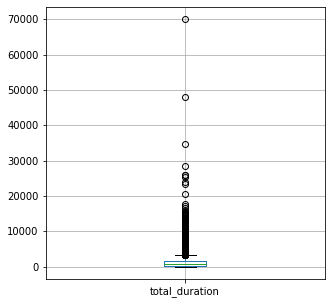

In [1145]:
boxplot1 = data.boxplot(['total_duration',], figsize=(5,5))

In [1146]:
#According to the plot above we see that we need to take the samples above 16000 and remove them from the data
data=data.loc[(data['total_duration']<16000)]

BounceRates

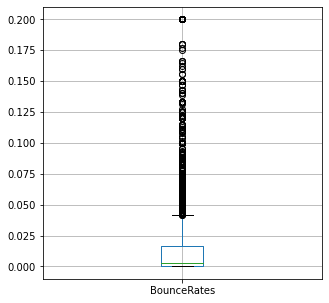

In [1147]:
boxplot2 = data.boxplot(['BounceRates',], figsize=(5,5))

In [1148]:
data=data.loc[(data['total_duration']<16000)]


In [1149]:
#According to the plot above we see that we need to take the samples above 0.175 and remove them from the data
data=data.loc[(data['BounceRates']<0.175)]

num_of_admin_pages

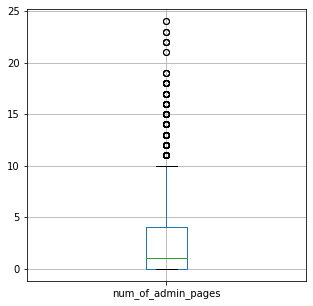

In [1150]:
boxplot3 = data.boxplot(['num_of_admin_pages',], figsize=(5,5))

In [1151]:
#According to the plot above we see that we need to take the samples above 20 and remove them from the data
data=data.loc[(data['BounceRates']<20)]


num_of_product_pages

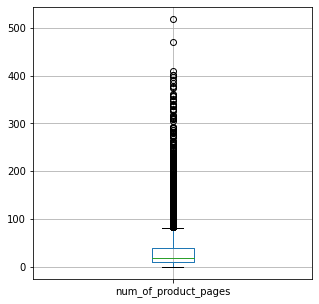

In [1152]:
boxplot3 = data.boxplot(['num_of_product_pages',], figsize=(5,5))

In [1153]:
data=data.loc[(data['num_of_product_pages']<450)]

PageValues

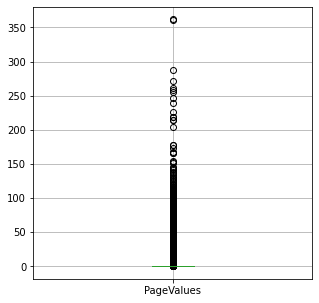

In [1154]:
boxplot3 = data.boxplot(['PageValues',], figsize=(5,5))

In [1155]:
data=data.loc[(data['PageValues']<300)]

In [1156]:
print(f"We had {num_of_samples_before_removing_outliers} and now we have {data.shape[0]} samples\n,meaning that we removed {num_of_samples_before_removing_outliers-data.shape[0]} outliers")


We had 10479 and now we have 9872 samples
,meaning that we removed 607 outliers


In [1157]:
data.shape

(9872, 26)

In [1158]:
X = data.iloc[:,:].values
y = data.iloc[:,-1]
X

array([[ 0.,  0., 18., ...,  0.,  0.,  1.],
       [ 0.,  0., 19., ...,  0.,  1.,  1.],
       [ 0.,  0.,  2., ...,  0.,  0.,  1.],
       ...,
       [ 0.,  0.,  6., ...,  1.,  0.,  1.],
       [ 4.,  0., 15., ...,  0.,  0.,  1.],
       [ 0.,  0.,  3., ...,  1.,  0.,  0.]])

Normalization

We will use our intenral function that will help us to normalize the data the normalization is important since we need to make sure all of our data is on the same scale

In [1159]:
X=normalize_data(X)

let's check how many dimantions we have on our data, and see if we need the Dimantion reduction

In [1160]:
X.shape

(9872, 26)

we have 32 dim, let's with how many dim we should use do it will give use 95% conf.

Now we need to reduce the dimentions of the tables

Number of components:
 [[ 3.76062299e-01  3.24246360e-01  4.72936433e-01  4.74082438e-01
  -1.94659891e-01  1.69103734e-01 -1.78868970e-01  2.67592043e-02
  -1.76030801e-02  3.12032560e-02 -2.20244856e-02  2.46678099e-01
   8.94183093e-02 -2.78333874e-02 -6.55383526e-03 -7.02448685e-02
  -1.19312487e-01 -2.05336131e-01  2.51515737e-02  2.68476077e-01
  -6.28502793e-03  8.71452830e-03 -3.88781585e-03 -1.23847816e-02
   3.28101713e-03  6.94970979e-03]
 [ 3.58801178e-02  6.66922964e-02  1.52453700e-01  1.36052615e-01
   1.55466529e-01 -1.22094691e-01  2.94322741e-01  3.45046622e-01
   2.81915035e-02 -6.58663094e-02  2.08195824e-02 -1.38648153e-01
   4.81083491e-01 -1.04445662e-01 -8.06847269e-02 -4.65719250e-01
  -9.00516431e-02  3.37632875e-01 -2.40973024e-02 -2.30005588e-01
  -2.59147689e-02  1.79075344e-02  6.20026736e-03  6.93124008e-03
  -6.15405661e-03  2.01252638e-01]
 [ 1.44540302e-01  1.92768833e-01  2.29327219e-01  2.33805495e-01
   1.07707655e-01 -7.52430791e-02  3.29727481e-01

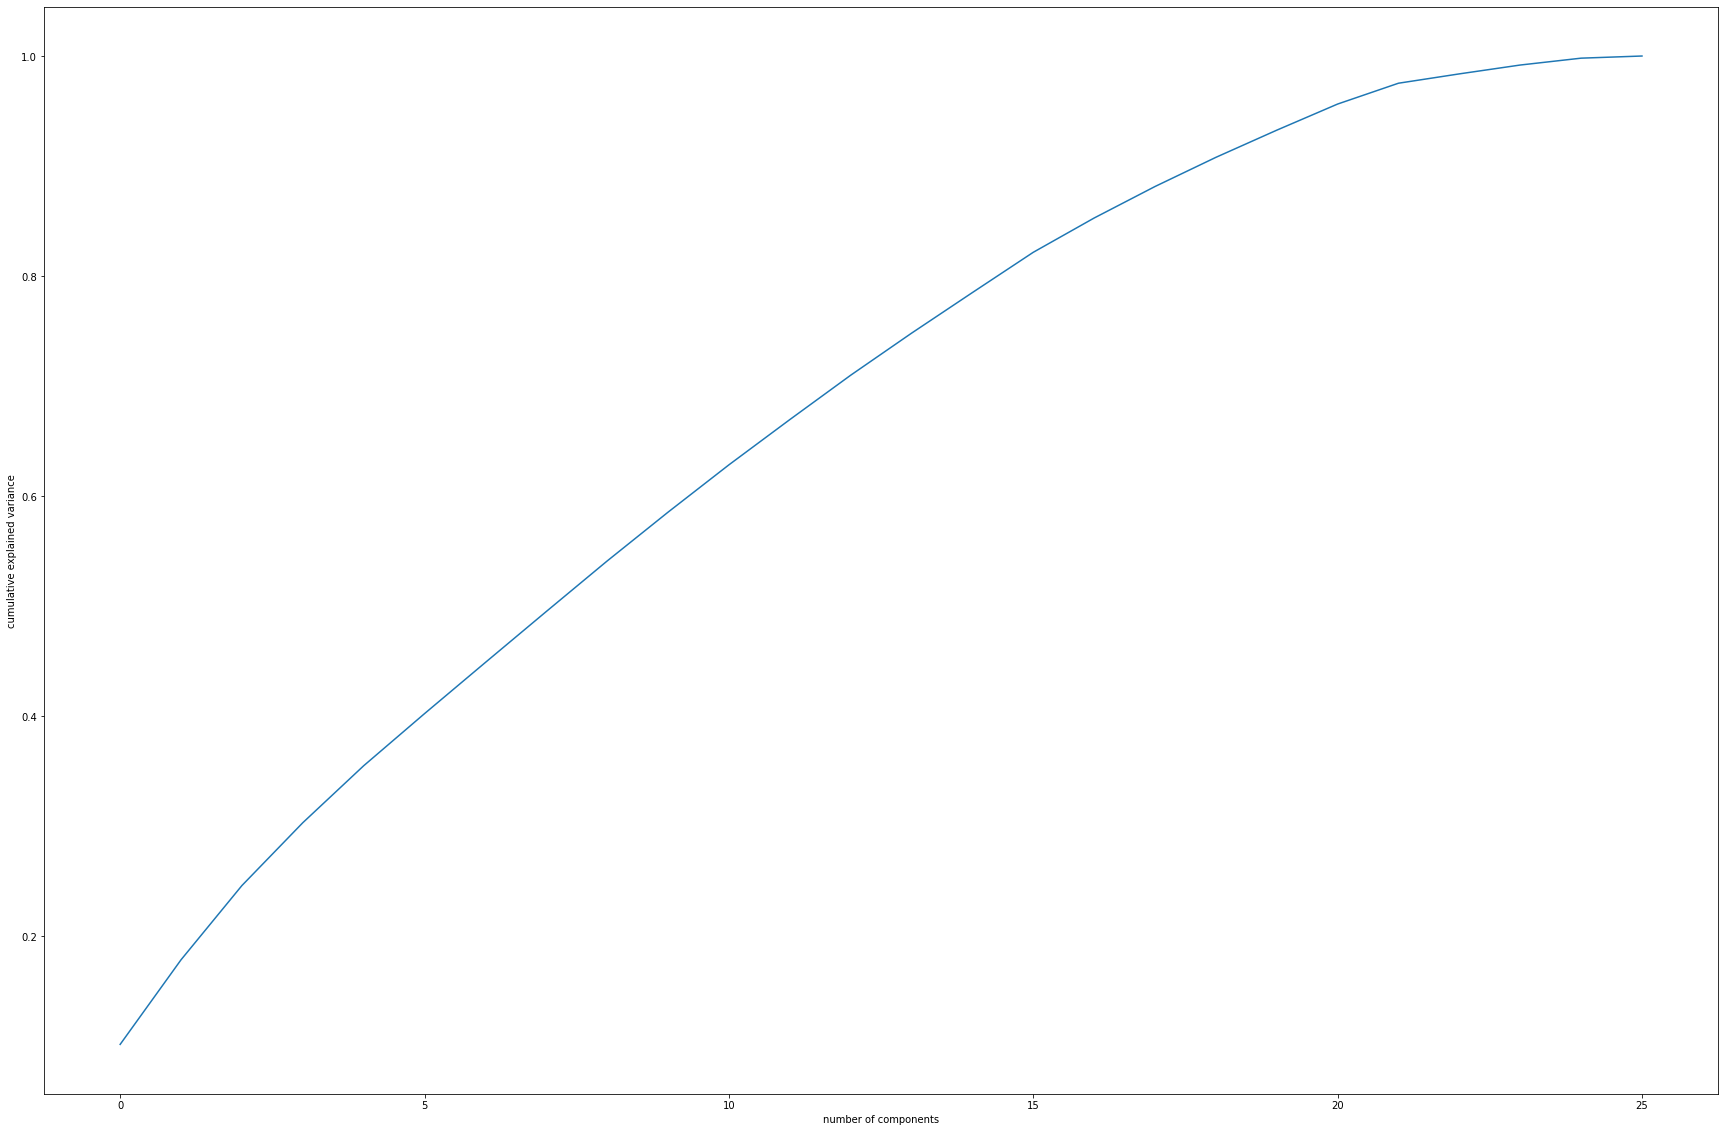

In [1161]:

plot_principal_components(X)


In [1162]:
X=dim_reduction_pca(X,0.95)

21
original shape: (9872, 26)
transformed shape: (9872, 21)


preprocessing on the test data

In [1163]:
test_data=pd.read_csv("test.csv",index_col=0)
test_data

#  drop columns with correlation according to the train data and remove columns with low percent of usable data such as D column.
test_data = test_data.drop(columns=['info_page_duration','product_page_duration','admin_page_duration','D','ExitRates','A'],inplace=False)

# cleaning the data remove unnecessary strings and casting str to floats
test_data['Weekend']=test_data['Weekend'].apply(change_bool_to_binary) 
test_data['internet_browser']=test_data['internet_browser'].astype(str).apply(get_browser_name)

#fill missing values with data from the train set
test_data['BounceRates'].fillna(raw_train_data['BounceRates'].median(), inplace = True) # only 22 missing values
test_data['total_duration'].fillna(raw_train_data['total_duration'].median(), inplace = True) # only 22 missing values
test_data['num_of_info_pages'].fillna(raw_train_data['num_of_info_pages'].median(), inplace = True) # only 22 missing values
test_data['num_of_admin_pages'].fillna(raw_train_data['num_of_admin_pages'].median(), inplace = True) # only 22 missing values
test_data['num_of_product_pages'].fillna(raw_train_data['num_of_product_pages'].median(), inplace = True)
test_data['closeness_to_holiday'].fillna(raw_train_data['closeness_to_holiday'].median(), inplace = True) # only 22 missing values
test_data['PageValues'].fillna(raw_train_data['PageValues'].median(), inplace = True) # only 22 missing values
test_data['device'].fillna(get_most_frequent(raw_train_data,'device'), inplace = True)
test_data['Region'].fillna(get_most_frequent(raw_train_data,'Region'), inplace = True)
test_data['Month'].fillna(get_most_frequent(raw_train_data,'Month'), inplace = True)
test_data['user_type'].fillna(get_most_frequent(raw_train_data,'user_type'), inplace = True)
test_data['B'].fillna(get_most_frequent(raw_train_data,'B'), inplace = True)
test_data['C'].fillna(get_most_frequent(raw_train_data,'C'), inplace = True)

test_data['user_type'].replace({"Other":get_most_frequent(raw_train_data,'user_type')},inplace=True)
test_data['Month'].replace({"Jan": "Q1","Feb":"Q1","Mar":"Q1","Apr":"Q2","May":'Q2',"June":'Q2',"July":'Q3',"Aug":"Q3","Sep":"Q3","Oct":"Q4","Nov":"Q4","Dec":"Q4"},inplace=True)

test_data=data_transform_dummy_vars(test_data,['internet_browser','Month','C','user_type'])

test_data.isna().sum()


num_of_admin_pages             0
num_of_info_pages              0
num_of_product_pages           0
total_duration                 0
BounceRates                    0
PageValues                     0
closeness_to_holiday           0
device                         0
Region                         0
Weekend                        0
B                              0
internet_browser_chrome        0
internet_browser_edge          0
internet_browser_nan           0
internet_browser_safari        0
Month_Q1                       0
Month_Q2                       0
Month_Q3                       0
Month_Q4                       0
C_log202                       0
C_log400                       0
C_log404                       0
C_log8080                      0
C_log_100                      0
user_type_Returning_Visitor    0
dtype: int64

## Part 3 - Models Fitting and Scores

#### Utils functions

In [1164]:
def logistic_regression_model(X_train: np.array,y_train: np.array) -> LogisticRegression:
  log_reg = LogisticRegression(C=1,penalty='l2',solver='liblinear')
  log_reg.fit(X_train,y_train)  
  return log_reg

def knn_model(X_train: np.array,y_train: np.array)->KNeighborsClassifier:
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train,y_train)
    return knn
  
def random_forrest_model(X_train: np.array,y_train: np.array)-> RandomForestClassifier:
    rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
    rf=rf.fit(X_train,y_train)
    return rf
  
def decision_tree_model(X_train: np.array,y_train: np.array)-> DecisionTreeClassifier:
  dt = DecisionTreeClassifier()
  dt.fit(X_train,y_train)
  return dt

def roc_auc(y_test: np.array, y_prob : np.array, clfname:str) -> None:
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.figure(figsize = (5,5))
    plt.title('ROC for ' + clfname)
    plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.5f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
def get_models_scores(models: list[Callable:[np.array,np.array]],X_train: np.array,y_train: np.array,X_test: np.array, y_test: np.array)->None:
  for model in models:
    model_after_fit=model(X_train,y_train)
    y_predict=model_after_fit.predict(X_test)
    y_predict_proba=model_after_fit.predict_proba(X_test)[:,1]
    acc_score=accuracy_score(y_test,y_predict)
    fpr, tpr, thresholds = roc_curve(y_test,y_predict_proba)
    test_auc = auc(fpr, tpr)
    print(f'Model name: {model.__name__} ,Accuracy: {acc_score}, AUC: {test_auc}\n')
    roc_auc(y_test,y_predict_proba,model.__name__)
    
def get_feature_importance(classifier,X,y,title):
  feature_importance = classifier.feature_importances_
  sorted_idx = np.argsort(feature_importance)
  print("printing feature importance of: ", title)
  for i,v in enumerate(feature_importance):
    print('Feature: %d, Score: %f' % (i,v))
  # plot feature importance
  plt.bar([x for x in range(len(feature_importance))], feature_importance)
  plt.show()
  # pos = np.arange(sorted_idx.shape[0])
  # plt.rcParams["figure.figsize"] = (12,8)
  # plt.bar(pos, feature_importance[sorted_idx])
  # plt.xticks(pos, np.array(y)[sorted_idx])
  # plt.title(title)
  # plt.xticks(rotation = 45) 
  # plt.show()
  
def get_feature_importance_log(classifier):
  # get importance
  importance = classifier.coef_[0]
  # summarize feature importance
  for i,v in enumerate(importance):
    print('Feature: %d, Score: %f' % (i,v))
  # plot feature importance
  plt.bar([x for x in range(len(importance))], importance)
  plt.show()


Model name: logistic_regression_model ,Accuracy: 1.0, AUC: 1.0

Model name: knn_model ,Accuracy: 0.9939230249831195, AUC: 0.9949273236944469

Model name: random_forrest_model ,Accuracy: 0.9078325455773126, AUC: 0.9918769863975344

Model name: decision_tree_model ,Accuracy: 0.9848075624577988, AUC: 0.9746688335729431

Feature: 0, Score: 0.000000
Feature: 1, Score: 0.082391
Feature: 2, Score: 0.071564
Feature: 3, Score: 0.052157
Feature: 4, Score: 0.002170
Feature: 5, Score: 0.009643
Feature: 6, Score: 0.000230
Feature: 7, Score: 0.000743
Feature: 8, Score: 0.000694
Feature: 9, Score: 0.000908
Feature: 10, Score: 0.034483
Feature: 11, Score: 0.001694
Feature: 12, Score: 0.151613
Feature: 13, Score: 0.000000
Feature: 14, Score: 0.090717
Feature: 15, Score: 0.182780
Feature: 16, Score: 0.060467
Feature: 17, Score: 0.233693
Feature: 18, Score: 0.016414
Feature: 19, Score: 0.000000
Feature: 20, Score: 0.007637


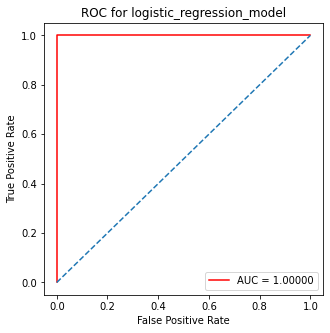

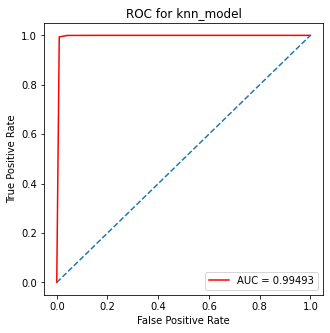

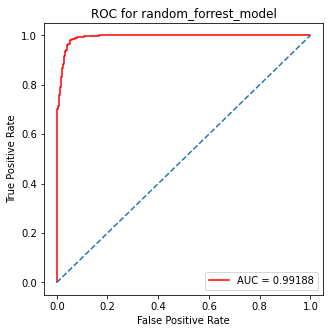

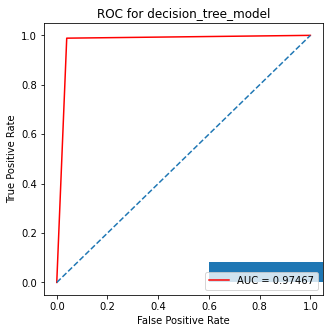

Feature: 0, Score: 0.006386
Feature: 1, Score: 0.219963
Feature: 2, Score: 0.062295
Feature: 3, Score: 0.131955
Feature: 4, Score: 0.002297
Feature: 5, Score: 0.000000
Feature: 6, Score: 0.000034
Feature: 7, Score: 0.000000
Feature: 8, Score: 0.001156
Feature: 9, Score: 0.001672
Feature: 10, Score: 0.034018
Feature: 11, Score: 0.000936
Feature: 12, Score: 0.067222
Feature: 13, Score: 0.000000
Feature: 14, Score: 0.022464
Feature: 15, Score: 0.085627
Feature: 16, Score: 0.026303
Feature: 17, Score: 0.321420
Feature: 18, Score: 0.011118
Feature: 19, Score: 0.000780
Feature: 20, Score: 0.004354


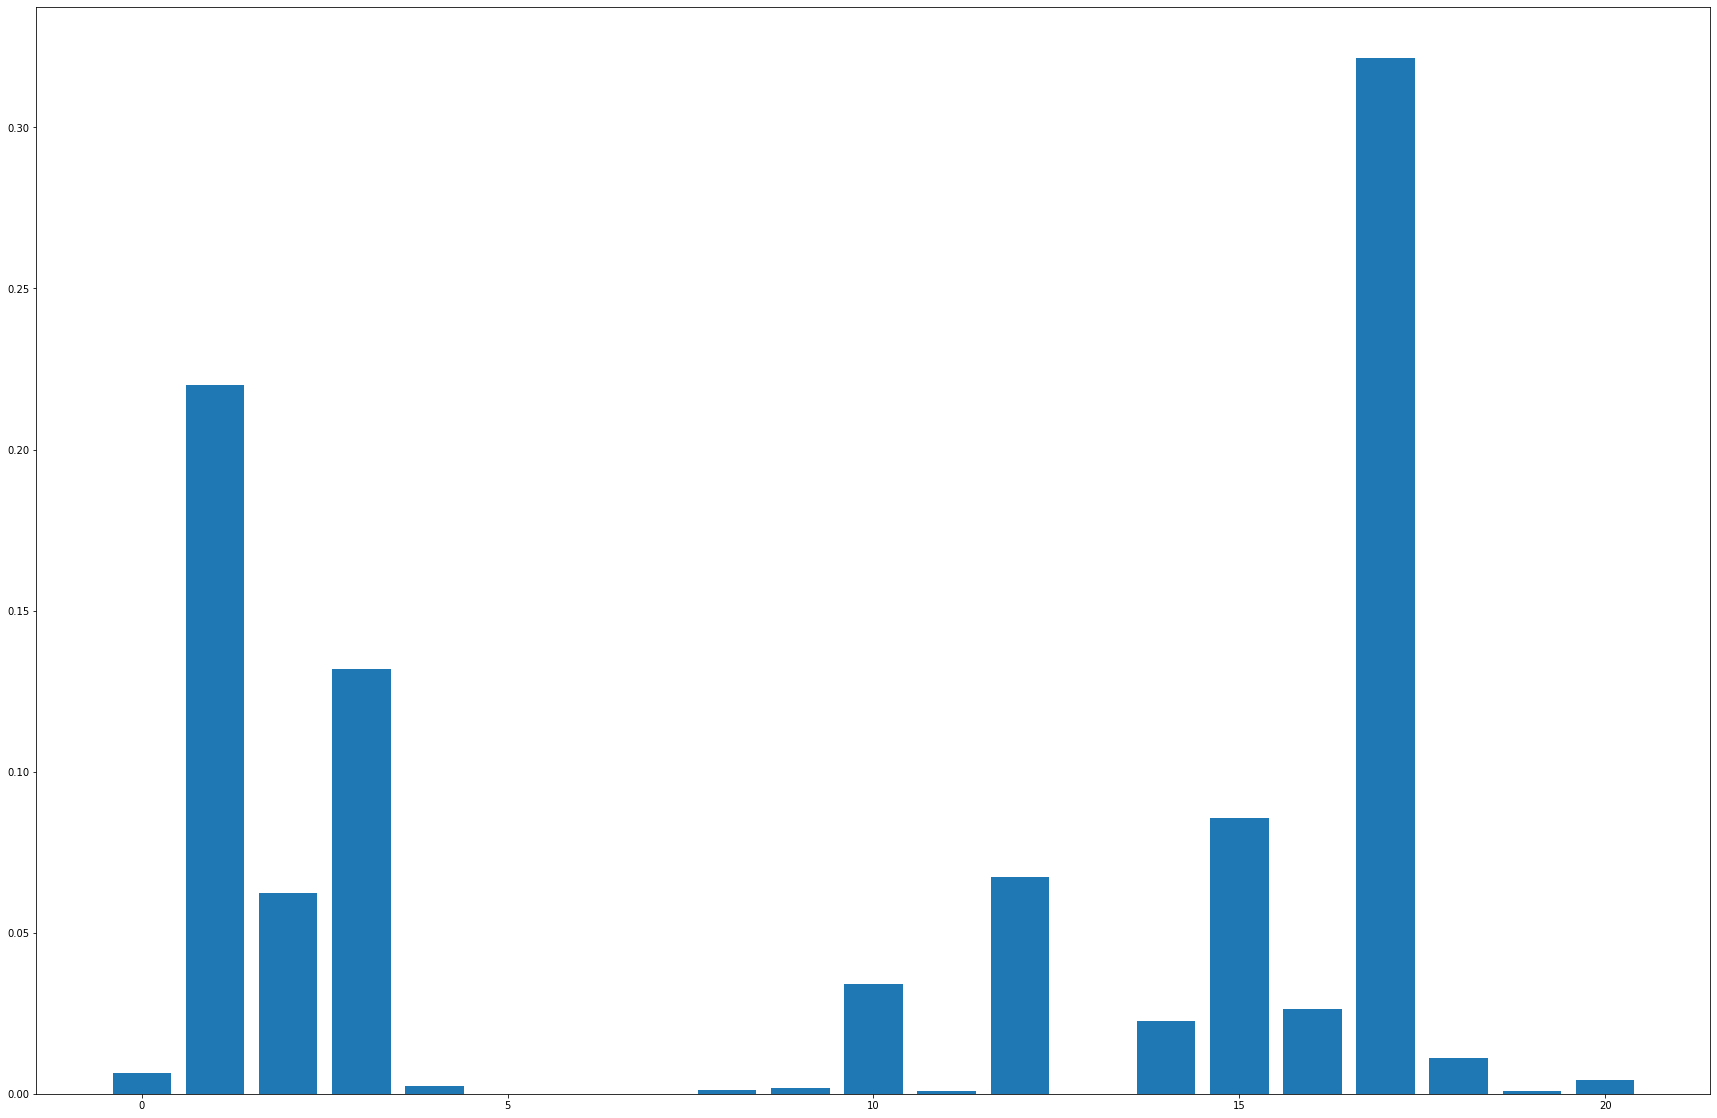

Feature: 0, Score: 0.052899
Feature: 1, Score: 1.046281
Feature: 2, Score: 1.033874
Feature: 3, Score: -1.449012
Feature: 4, Score: -0.331687
Feature: 5, Score: 0.609432
Feature: 6, Score: -0.063679
Feature: 7, Score: 0.357762
Feature: 8, Score: -0.220350
Feature: 9, Score: -0.056127
Feature: 10, Score: -0.919898
Feature: 11, Score: -0.054604
Feature: 12, Score: 2.003776
Feature: 13, Score: -0.042563
Feature: 14, Score: 1.368535
Feature: 15, Score: 1.344511
Feature: 16, Score: -1.073886
Feature: 17, Score: -2.490120
Feature: 18, Score: -0.954111
Feature: 19, Score: 0.320653
Feature: 20, Score: -1.030083


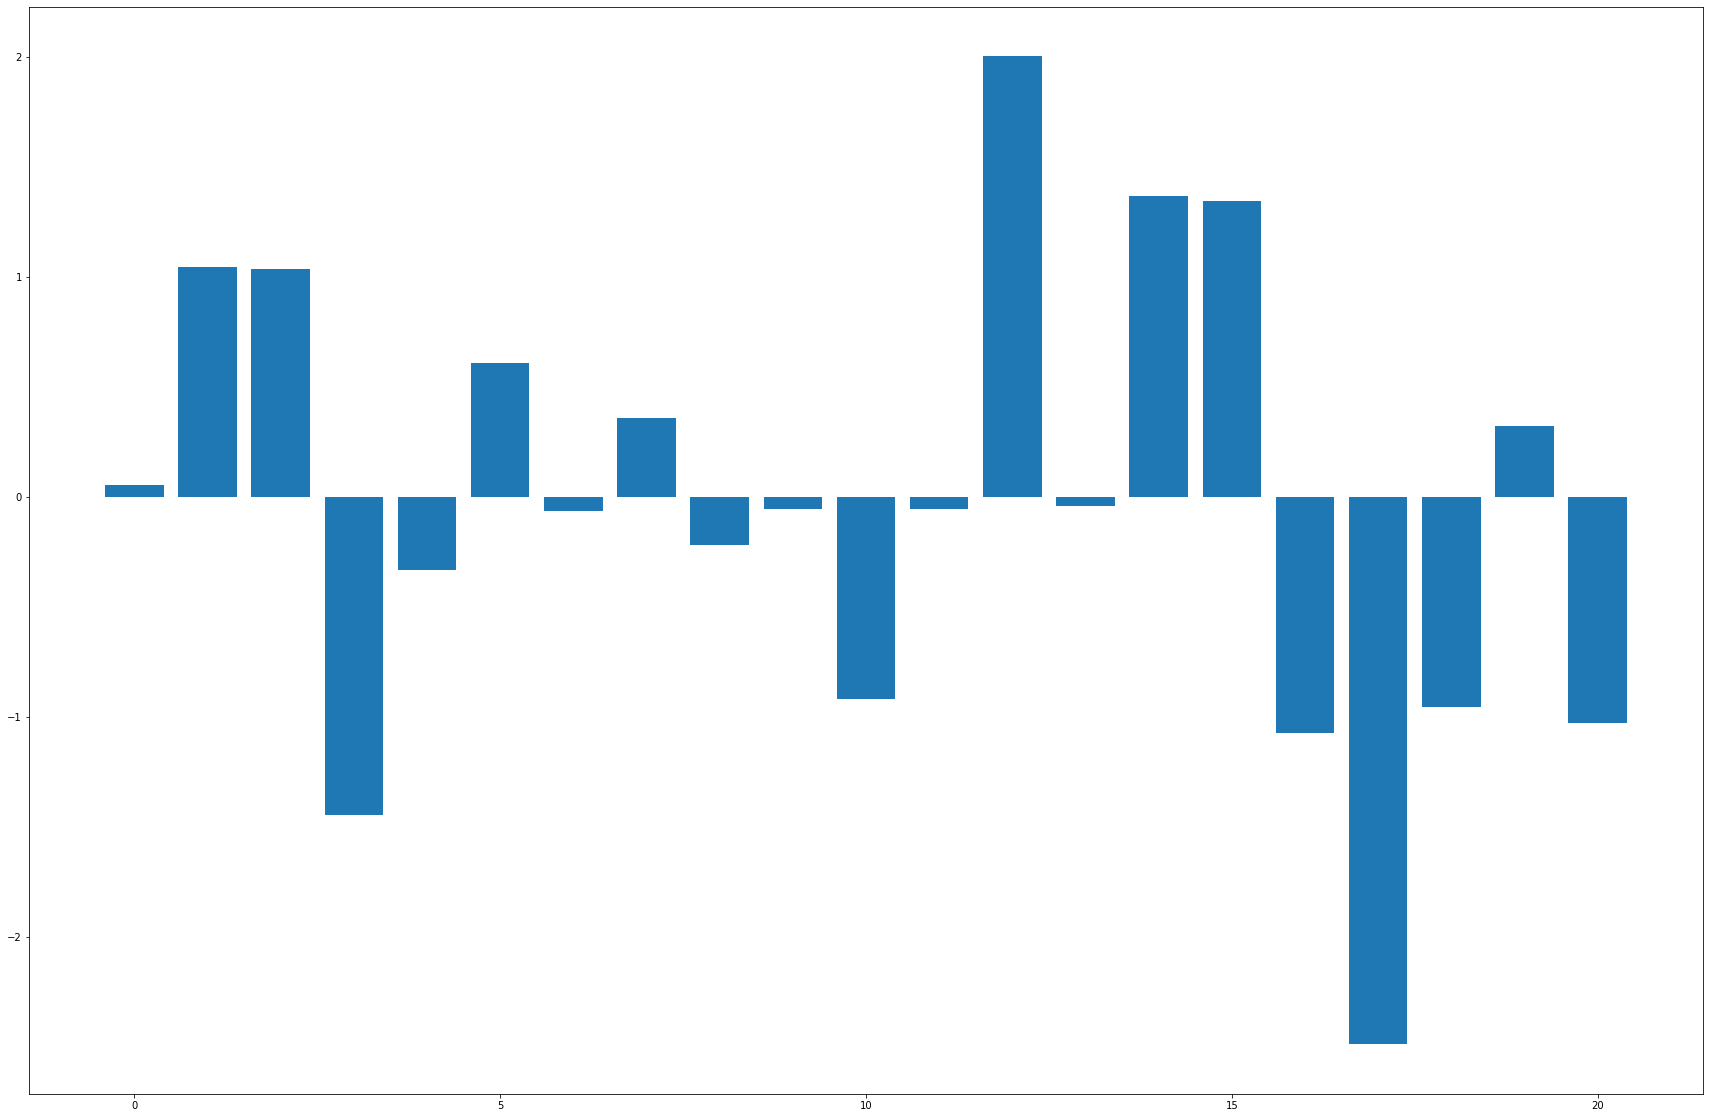

In [1165]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)
models=[logistic_regression_model,knn_model,random_forrest_model,decision_tree_model]
get_models_scores(models,X_train,y_train,X_test,y_test)
#gettting the feature importance of the models 
get_feature_importance(random_forrest_model(X_train,y_train),X_train,y_train,'Random')
get_feature_importance(decision_tree_model(X_train,y_train),X_train,y_train,'Decision_Tree')
get_feature_importance_log(logistic_regression_model(X_train,y_train))


# Part 4 - Models Evaluation

In [1166]:
#feature importance- to find the problematic feature 
#Auc- make sure we did the calculation as it should be
#make the split as soon as we can

#### Utils functions

In [1167]:
def plot_confusion_matrix(classifier,labels,prediction,display_labels):
  cm = confusion_matrix(labels,prediction)
  cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=display_labels)
  plt.plot(cm_display,title=f'Confusion Matrix {cm}')
  plt.show()
  
def plot_roc_curve(classifier,X,y):
    y_pred=classifier.predict(X)
    fpr,tpr,thresholds=roc_curve(y,y_pred)
    auc=auc(fpr,tpr)
    plt.plot(fpr,tpr)
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.title('ROC curve')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
    
def K_fold_cross_validation(classifier,X,y,k):
    kf = KFold(n_splits=k,shuffle=True)
    kf.get_n_splits(x)
    accuracy=[]
    for train_index,test_index in kf.split(X):
        X_train,X_test=X.iloc[train_index],X.iloc[test_index]
        y_train,y_test=y.iloc[train_index],y.iloc[test_index]
        classifier.fit(X_train,y_train)
        y_pred=classifier.predict(X_test)
        accuracy.append(accuracy_score(y_test,y_pred))
    return accuracy
#def feature_importance(classifier,X,y,title):
#   feature_importance = classifier.feature_importances_
#    sorted_idx = np.argsort(feature_importance)
#   pos = np.arange(sorted_idx.shape[0]) + .5
#   plt.rcParams["figure.figsize"] = (12,8)
#   plt.bar(pos, feature_importance[sorted_idx], align='center')
#   plt.xticks(pos, np.array(X.columns)[sorted_idx])
#   plt.title(title)
#   plt.xticks(rotation = 45) 
#   plt.show()
  
# def grid_search_roc_auc(classifier,params,X,y):
#   gscv=GridSearchCV(classifier,params,scoring='roc_auc')
#   gscv.fit(X, y)
#   predict_proba=gscv.predict_proba(X_bos_test)[:,1]
#   best_params = gscv.best_params_
#   best_score = gscv.best_score_
#   fpr, tpr, thresholds = roc_curve(X,predict_proba)
#   test_auc = auc(fpr, tpr)

#### Confusion matrix

In [1168]:
plot_confusion_matrix(classifier,labels,prediction,display_labels)
K_fold_cross_validation(classifier,X,y,k)

NameError: name 'classifier' is not defined

## Part 5 - Prediction

#### Utils functions

In [ ]:
def save_to_csv(data,file_name):
  data.to_csv(f'{file_name}.csv');

In [ ]:
test_data=pd.read_csv("test.csv")
classifier=chossen_classifier
classifier.fit()
y_proba=classifier.predict_proba(X_test)[:,1]
y_pred=classifier.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_proba

In [ ]:
submission_data=pd.DataFrame(data=y_proba,index=X_test.index)
save_to_csv(submission_data,'Submission_group_16')

# PROJECT PIPELINE

In [ ]:
def pipeline_data_exploration():
  display(data)
  display(data.head(10))
  display(data.describe())
  display(data.shape)

def pipeline_preprocessing():
  pass
def pipeline_feature_engineering():
  pass
def pipeline_model_selection():
  pass
def pipeline_model_training():
  pass
def pipeline_model_evaluation():
  pass
def pipeline_model_prediction():
  pass
def pipeline_model_submission():
  pass

def run_pipeline():
  pipeline_data_exploration()
  pipeline_preprocessing()
  pipeline_model_selection()
  pipeline_model_training()
  pipeline_model_evaluation()
  pipeline_model_prediction()
  pipeline_model_submission()

In [ ]:
# remove the comment on the next line to run the entire project's pipeline !!!
# run_pipepline()